<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08

**Objetivo**: Aplicar técnicas de **machine learning no supervisado** para explorar, procesar y analizar conjuntos de datos con variables numéricas y categóricas.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.


## Clustering


<img src="https://www.svgrepo.com/show/253022/car.svg" width = "300" align="center"/>



El conjunto de datos **`vehiculos_procesado_con_grupos.csv`** recopila información sobre diversas características relevantes de distintos vehículos. El propósito de este ejercicio es **clasificar los vehículos en diferentes categorías**, utilizando como base las variables descritas en la tabla de atributos.

El análisis presenta un desafío adicional debido a la **naturaleza mixta de los datos**: se incluyen tanto variables **numéricas** (ej. dimensiones, consumo, emisiones) como **categóricas** (ej. tipo de tracción, tipo de combustible), lo que requiere aplicar técnicas de preprocesamiento adecuadas antes de entrenar los modelos.

Como primer paso, procederemos a **cargar y explorar el conjunto de datos**, con el fin de familiarizarnos con su estructura y las características que servirán como base para la posterior clasificación.




**Descripción de los Datos:**

| **Nombre de la Columna**   | **Descripción**                                                                                                                                   |
|----------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| **year**                   | El año en que el vehículo fue fabricado.                                                                                                          |
| **desplazamiento**          | La capacidad volumétrica del motor en litros. Indica la cantidad de aire y combustible que puede desplazar el motor durante una revolución.       |
| **cilindros**               | El número de cilindros que tiene el motor. Los cilindros son las cámaras donde ocurre la combustión interna en los motores de los vehículos.       |
| **co2**                     | Emisiones de dióxido de carbono del vehículo, medido en gramos por kilómetro. Es una medida de las emisiones de gases de efecto invernadero.       |
| **clase_tipo**              | La clase o tipo de vehículo, como vehículos especiales, deportivos, etc.                                                                         |
| **traccion_tipo**           | Tipo de tracción del vehículo, ya sea tracción en dos ruedas, en cuatro ruedas o en todas las ruedas.                                             |
| **transmision_tipo**        | Tipo de transmisión del vehículo, como automática, manual, entre otros.                                                                          |
| **combustible_tipo**        | Tipo de combustible que utiliza el vehículo, como gasolina, diésel, eléctrico, híbrido, etc.                                                     |
| **tamano_motor_tipo**       | Clasificación del tamaño del motor (por ejemplo, pequeño, mediano o grande), que generalmente se basa en la capacidad de desplazamiento.           |
| **consumo_tipo**            | Clasificación del nivel de consumo de combustible del vehículo, indicando si es alto, bajo, o muy alto.                                           |
| **co2_tipo**                | Clasificación de las emisiones de CO2 del vehículo, indicando si es alto, bajo, o muy alto.                                                       |
| **consumo_litros_milla**    | El consumo de combustible del vehículo, medido en litros por milla. Indica la eficiencia del vehículo en términos de consumo de combustible.        |



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline

sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante",
             "modelo",
             "transmision",
             "traccion",
             "clase",
             "combustible",
             "consumo"],

          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

- Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.
- Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

- Junte ambos dataset en uno, llamado **df_procesado**.

In [ ]:
# Seleccionar las columnas numéricas
num_cols = df.select_dtypes(include=np.number).columns
num_val = df[num_cols].copy()

# Rellenar los valores NaN con el promedio de cada columna
num_val.fillna(num_val.mean(), inplace=True)

# Normalizar los datos numéricos usando MinMaxScaler
scaler = MinMaxScaler()
num_val_scaled = scaler.fit_transform(num_val)

# Convertir el array numpy de vuelta a un DataFrame
num_val_scaled = pd.DataFrame(num_val_scaled, columns=num_cols)

display(num_val_scaled.head())

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.424351,0.360294


In [ ]:
# Seleccionar las columnas categóricas
cat_cols = df.select_dtypes(include='object').columns
cat_val = df[cat_cols].copy()

# Aplicar one-hot encoding a las variables categóricas
cat_val_encoded = pd.get_dummies(cat_val, dummy_na=False, dtype=int)

display(cat_val_encoded.head())

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


`pd.get_dummies()` convierte variables categóricas en variables dummy/indicadoras. Por cada columna categórica original, crea nuevas columnas binarias (0 o 1) para cada categoría única en esa columna. Por ejemplo, si tienes una columna 'color' con valores 'rojo', 'azul', 'verde', `get_dummies` creará tres nuevas columnas: 'color_rojo', 'color_azul', 'color_verde'. Si una fila tenía 'rojo' en la columna 'color', tendrá un 1 en 'color_rojo' y 0 en las otras columnas de color.

In [ ]:
# Juntar ambos datasets
df_procesado = pd.concat([num_val_scaled, cat_val_encoded], axis=1)

display(df_procesado.head())

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas

In [ ]:
# Ajustar el modelo de kmeans con 8 clusters
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10) # Added n_init for newer KMeans versions
kmeans.fit(df_procesado)

# Calcular los centroides de cada cluster
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_procesado.columns) # Use all columns from df_procesado before adding 'cluster'

# Asociar a cada individuo el correspondiente cluster
df_procesado['cluster'] = kmeans.labels_

display(df_procesado.head(8))
display(centroids)

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo,cluster
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,4
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,4
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,3
5,0.382353,0.205128,0.142857,0.302243,0.224599,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,7
6,0.382353,0.205128,0.142857,0.275108,0.194444,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
7,0.382353,0.307692,0.285714,0.334805,0.260784,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,2


,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.427318,0.223790,0.173637,0.304599,0.226412,0.126441,0.097434,0.004835,0.088137,0.517665,...,1.831868e-15,9.776869e-01,9.048318e-15,9.076073e-15,2.231313e-02,4.635181e-15,9.921904e-01,7.809595e-03,4.246603e-15,-1.201816e-14
1,0.569367,0.169607,0.146057,0.240820,0.156357,0.007990,0.117281,0.017606,0.138407,0.629063,...,-1.232348e-14,-1.679212e-14,1.354280e-04,-1.024181e-14,9.998646e-01,-9.103829e-15,1.218852e-03,8.125677e-04,8.160139e-15,9.979686e-01
2,0.407666,0.331397,0.256796,0.354288,0.282121,0.181278,0.084035,0.090474,0.133564,0.184580,...,-7.271961e-15,1.386825e-02,9.808486e-01,7.355228e-15,5.283143e-03,1.155688e-03,-1.712519e-14,9.988443e-01,-6.022960e-15,-1.582068e-15
3,0.476969,0.450984,0.327266,0.410019,0.343261,0.304450,0.017116,0.041506,0.048567,0.151048,...,9.584938e-01,-1.421085e-14,4.065041e-02,8.557980e-04,-6.578071e-15,9.957210e-01,7.494005e-16,6.418485e-04,3.637142e-03,-1.768030e-14
4,0.384236,0.585590,0.430797,0.510289,0.454503,0.259250,0.005599,0.059153,0.059396,0.197420,...,3.115871e-02,-1.321165e-14,1.168452e-02,9.571568e-01,-6.494805e-15,1.703992e-03,7.494005e-16,4.868549e-04,9.978092e-01,-1.662559e-14
5,0.588730,0.362290,0.299545,0.354136,0.282247,0.001505,0.083020,0.086531,0.189616,0.558816,...,5.016303e-04,2.608478e-02,9.731628e-01,1.360023e-14,2.508151e-04,2.357662e-02,7.771561e-16,9.764234e-01,-1.040834e-14,-1.634803e-14
6,0.452443,0.562730,0.405562,0.501887,0.442585,0.435441,0.001318,0.003953,0.010211,0.058300,...,5.764163e-02,-1.032507e-14,5.599473e-03,9.367589e-01,-6.300516e-15,6.883383e-15,7.216450e-16,-9.436896e-15,1.000000e+00,-1.357248e-14
7,0.579550,0.269830,0.210005,0.305067,0.226473,0.025947,0.094316,0.072488,0.192545,0.397446,...,6.177924e-04,9.619028e-01,8.237232e-04,1.523781e-14,3.665568e-02,2.969847e-15,9.684926e-01,2.944811e-02,-1.587619e-14,2.059308e-03


In [ ]:
# Obtener las columnas numéricas originales (antes del one-hot encoding)
original_num_cols = df.select_dtypes(include=np.number).columns

# Calcular el promedio de las variables numéricas por cluster
cluster_means = df_procesado.groupby('cluster')[original_num_cols].mean()
print("Promedio de variables numéricas por cluster:")
display(cluster_means)

# Calcular la moda de las variables numéricas por cluster
# Use a function that returns the mode, handling multiple modes if necessary
cluster_modes = df_procesado.groupby('cluster')[original_num_cols].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
print("\nModa de variables numéricas por cluster:")
display(cluster_modes)

Promedio de variables numéricas por cluster:


,year,desplazamiento,cilindros,co2,consumo_litros_milla
cluster,,,,,
0,0.427318,0.223790,0.173637,0.304599,0.226412
1,0.569367,0.169607,0.146057,0.240820,0.156357
2,0.407666,0.331397,0.256796,0.354288,0.282121
3,0.476969,0.450984,0.327266,0.410019,0.343261
4,0.384236,0.585590,0.430797,0.510289,0.454503
5,0.588730,0.362290,0.299545,0.354136,0.282247
6,0.452443,0.562730,0.405562,0.501887,0.442585
7,0.579550,0.269830,0.210005,0.305067,0.226473



Moda de variables numéricas por cluster:


,year,desplazamiento,cilindros,co2,consumo_litros_milla
cluster,,,,,
0,0.000000,0.179487,0.142857,0.317749,0.241830
1,0.970588,0.179487,0.142857,0.275108,0.194444
2,0.000000,0.307692,0.285714,0.374603,0.305011
3,0.029412,0.474359,0.285714,0.424351,0.331027
4,0.000000,0.564103,0.428571,0.454199,0.393464
5,0.617647,0.307692,0.285714,0.374603,0.281734
6,0.558824,0.653846,0.428571,0.454199,0.393464
7,0.970588,0.179487,0.142857,0.317749,0.241830


### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una vez realizado el gráfico, saque sus propias conclusiones del caso.

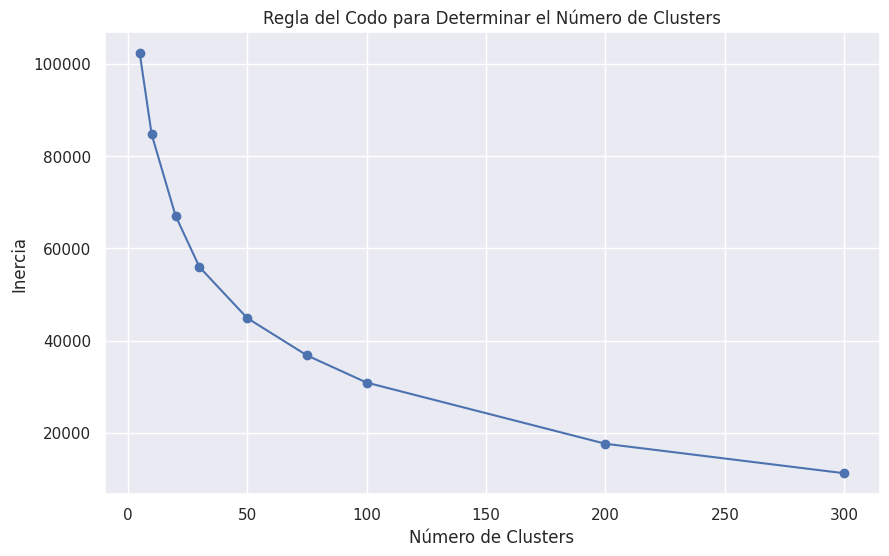

,Number of Clusters,Score
0,5,102310.085717
1,10,84705.942260
2,20,67073.433922
3,30,55953.931718
4,50,44887.890355


In [ ]:
# implementación de la regla del codo
Nc = [5, 10, 20, 30, 50, 75, 100, 200, 300]
kmeans = [KMeans(n_clusters=i, n_init=10, random_state=42) for i in Nc]
score = [kmeans[i].fit(df_procesado.drop('cluster', axis=1)).inertia_ for i in range(len(kmeans))]

df_Elbow = pd.DataFrame({'Number of Clusters': Nc, 'Score': score})

# Graficar la regla del codo
plt.figure(figsize=(10, 6))
plt.plot(df_Elbow['Number of Clusters'], df_Elbow['Score'], marker='o', linestyle='-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Regla del Codo para Determinar el Número de Clusters')
plt.grid(True)
plt.show()

display(df_Elbow.head())

Al observar el gráfico resultante, se pueden obtener conclusiones sobre el número apropiado de clusters. La regla del codo sugiere elegir el número de clusters donde la reducción en la inercia se estabiliza significativamente. En otras palabras, se busca el punto en el gráfico donde la curva de inercia comienza a aplanarse o forma un codo.

Observando el grafico podemos notar que se empieza a aplnar entre los 50 y 100 clusters

## Reducción de Dimensionalidad

<img src="https://1000logos.net/wp-content/uploads/2020/11/Wine-Logo-old.png" width = "300" align="center"/>


Para este ejercicio utilizaremos el **Wine Dataset**, un conjunto de datos clásico disponible en la librería **scikit-learn** y en el repositorio de la **UCI Machine Learning**.
Este dataset contiene información de **178 muestras de vino** provenientes de la región italiana de *Piamonte*. Cada vino pertenece a una de **tres variedades de uva** (*clases*), que actúan como etiquetas para el análisis supervisado, pero aquí se usarán solo como referencia en la visualización.

Cada muestra está descrita por **13 variables químicas** obtenidas de un análisis de laboratorio, entre ellas:

* **Alcohol**: porcentaje de alcohol en el vino.
* **Malic acid**: concentración de ácido málico.
* **Ash**: contenido de ceniza.
* **Alcalinity of ash**: alcalinidad de la ceniza.
* **Magnesium**: cantidad de magnesio (mg/L).
* **Total phenols**: concentración total de fenoles.
* **Flavanoids**: tipo de fenoles con propiedades antioxidantes.
* **Nonflavanoid phenols**: fenoles que no son flavonoides.
* **Proanthocyanins**: compuestos relacionados con el color y el sabor.
* **Color intensity**: intensidad del color del vino.
* **Hue**: matiz del color.
* **OD280/OD315 of diluted wines**: relación de absorbancia que mide la calidad del vino.
* **Proline**: concentración de prolina (un aminoácido).

Estas características permiten representar cada vino como un punto en un espacio de **13 dimensiones**.

El objetivo del análisis con este dataset es **reducir la dimensionalidad** para visualizar y explorar patrones en los datos. Para ello aplicaremos:

* **PCA (Principal Component Analysis):** identificar las combinaciones lineales de variables que explican la mayor varianza en el conjunto.
* **t-SNE (t-distributed Stochastic Neighbor Embedding):** mapear las muestras a 2D o 3D, preservando relaciones de vecindad y estructuras no lineales.

La comparación entre ambas técnicas permitirá observar cómo las tres clases de vinos se diferencian en el espacio reducido y discutir la utilidad de la reducción de dimensionalidad en datos con mayor número de variables que en el caso del dataset *Wine*.



In [ ]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [ ]:
# cargar dataset
dataset = load_wine()

# nombres de las variables
features = dataset.feature_names
target = 'wine_class'

# construir DataFrame
wine = pd.DataFrame(dataset.data, columns=features)
wine[target] = dataset.target

# ver primeras filas
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0




### 1. **Análisis detallado con PCA**

* Calcular la **varianza explicada** por cada componente principal y representar el gráfico de varianza acumulada, identificando cuántos componentes son necesarios para capturar al menos el **90–95% de la información**.
* Construir tablas y gráficos que muestren cómo las observaciones (vinos) se proyectan en las primeras componentes principales.
* Analizar los **loadings** (coeficientes de cada variable en los componentes) e interpretar qué características químicas del vino (alcohol, fenoles, color, etc.) tienen mayor influencia en las nuevas dimensiones.
* Visualizar los datos reducidos a 2D o 3D e interpretar si las **tres variedades de vino** se separan de forma clara en el espacio proyectado.



Varianza explicada por cada componente principal:


array([0.40749485, 0.18970352, 0.08561671, 0.07426678, 0.05565301,
       0.04658837, 0.03663929, 0.02408789, 0.02274371, 0.02250965,
       0.01381292, 0.01273236, 0.00815095])


Varianza acumulada por número de componentes:


array([0.40749485, 0.59719836, 0.68281507, 0.75708185, 0.81273486,
       0.85932323, 0.89596252, 0.92005041, 0.94279412, 0.96530376,
       0.97911669, 0.99184905, 1.        ])

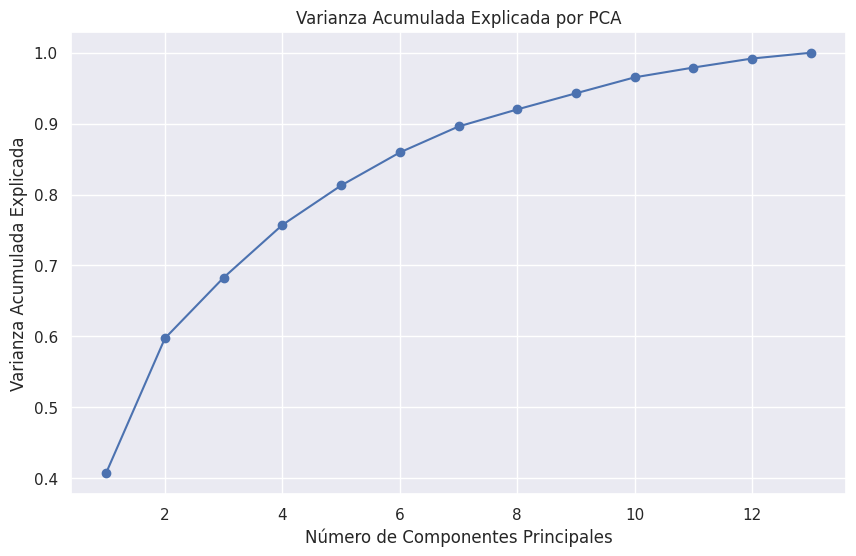


Número de componentes para 90% de varianza: 8
Número de componentes para 95% de varianza: 10


In [ ]:
# Separar características y objetivo
X = wine.drop(target, axis=1)
y = wine[target]

# Normalizar los datos antes de aplicar PCA
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
pca.fit(X_scaled)

# Varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
display(explained_variance_ratio)

# Varianza acumulada
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("\nVarianza acumulada por número de componentes:")
display(cumulative_explained_variance)

# Gráfico de varianza acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.title('Varianza Acumulada Explicada por PCA')
plt.grid(True)
plt.show()

# Determinar el número de componentes para el 90-95% de la varianza
n_components_90 = np.argmax(cumulative_explained_variance >= 0.90) + 1
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1

print(f"\nNúmero de componentes para 90% de varianza: {n_components_90}")
print(f"Número de componentes para 95% de varianza: {n_components_95}")


Datos proyectados en 2 componentes principales:


,PC1,PC2,wine_class
0,0.706336,0.253193,0
1,0.484977,0.008823,0
2,0.521172,0.189187,0
3,0.821644,0.580906,0
4,0.202546,0.059467,0



Datos proyectados en 3 componentes principales:


,PC1,PC2,PC3,wine_class
0,0.706336,0.253193,0.024093,0
1,0.484977,0.008823,-0.280482,0
2,0.521172,0.189187,0.196217,0
3,0.821644,0.580906,0.081110,0
4,0.202546,0.059467,0.300240,0


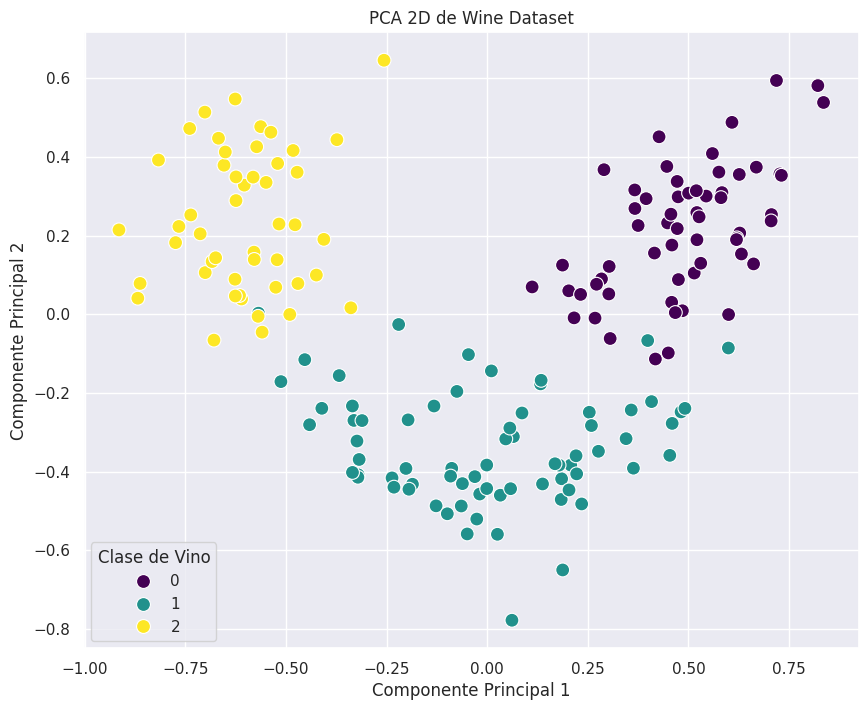

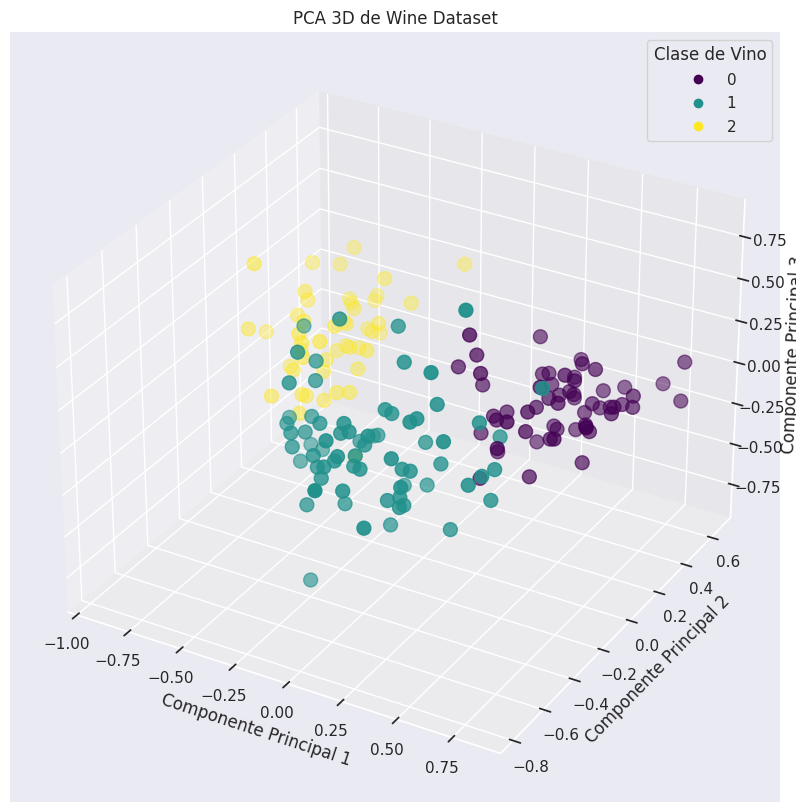

In [ ]:
# Proyectar los datos en las primeras 2 y 3 componentes principales para visualización
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Crear DataFrames para las componentes principales 2D y 3D
df_pca_2d = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
df_pca_2d['wine_class'] = y

df_pca_3d = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d['wine_class'] = y

print("\nDatos proyectados en 2 componentes principales:")
display(df_pca_2d.head())

print("\nDatos proyectados en 3 componentes principales:")
display(df_pca_3d.head())

# Visualización 2D
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='PC1', y='PC2', hue='wine_class', data=df_pca_2d, palette='viridis', s=100)
plt.title('PCA 2D de Wine Dataset')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Clase de Vino', loc='best')
plt.grid(True)
plt.show()

# Visualización 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca_3d['PC1'], df_pca_3d['PC2'], df_pca_3d['PC3'], c=df_pca_3d['wine_class'], cmap='viridis', s=100)
ax.set_title('PCA 3D de Wine Dataset')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
legend = ax.legend(*scatter.legend_elements(), title="Clase de Vino")
plt.show()

In [ ]:
# Analizar los loadings (coeficientes) de las primeras componentes
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=features)
print("\nLoadings de las componentes principales:")
display(loadings)


Loadings de las componentes principales:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
alcohol,0.133368,0.550884,-0.083848,0.040328,-0.278010,-0.137254,-0.275352,0.555031,-0.326687,-0.035912,-0.280685,0.056127,0.011360
malic_acid,-0.248516,0.227391,0.492039,-0.486032,-0.412890,-0.213103,0.310302,-0.076928,0.014471,-0.237073,0.170375,-0.061654,0.029428
ash,0.000739,0.163091,0.403009,0.241976,0.286394,-0.300965,-0.171805,-0.123460,0.044362,-0.056899,0.090757,0.632538,-0.348604
alcalinity_of_ash,-0.177839,-0.079776,0.477242,0.081694,0.418305,-0.135610,-0.297556,0.270756,0.204924,-0.132503,-0.200864,-0.476650,0.212755
magnesium,0.088657,0.188166,0.006551,-0.015880,0.470899,-0.312519,0.520419,-0.019937,-0.471910,0.325868,0.027277,-0.144635,0.123445
total_phenols,0.395071,0.074145,0.253065,0.052643,-0.018030,0.283604,-0.066524,-0.413384,-0.351232,-0.263006,-0.247764,-0.333709,-0.387628
flavanoids,0.414590,0.001007,0.196105,0.027033,0.002573,0.147045,-0.050698,-0.156461,-0.088960,-0.199445,0.030579,0.299871,0.775692
nonflavanoid_phenols,-0.333109,0.009960,0.285982,0.709095,-0.360038,0.197232,0.214889,-0.034232,-0.122889,0.236775,-0.032550,-0.047311,0.118318
proanthocyanins,0.252902,0.031418,0.228342,-0.076574,0.148666,0.503115,0.466207,0.483470,0.284054,0.018743,-0.099315,0.164957,-0.180607
color_intensity,-0.092329,0.519707,-0.033100,0.026322,0.200582,0.388032,-0.212596,-0.036924,0.023708,0.039143,0.669144,-0.179211,0.016243


Segun los graficos se podria decir que los datos si se agrupan pero no se separan de forma tan clara


**Interpretación de Loadings de PCA:**

Observa la tabla de loadings (`loadings`) generada en la celda anterior. Los valores en esta tabla indican la fuerza y dirección de la relación entre cada variable original y cada componente principal.

*   Para cada componente principal (columnas PC1, PC2, etc.), identifica las variables que tienen los valores absolutos más altos. Estos son los loadings más fuertes, lo que significa que esas características químicas tienen una mayor influencia en esa componente principal.
*   Describe qué características parecen ser más importantes en las primeras componentes principales (PC1, PC2, PC3), ya que son las que explican la mayor parte de la varianza. Por ejemplo, un loading alto (positivo o negativo) para "alcohol" en PC1 significa que el contenido de alcohol es un factor importante en la primera dimensión principal de tus datos.



### 2. **Análisis detallado con t-SNE**

* Aplicar **t-SNE** para reducir los datos a 2 dimensiones, probando diferentes configuraciones de hiperparámetros como *perplexity* y *learning rate*.
* Comparar las distintas visualizaciones obtenidas y discutir cómo los hiperparámetros afectan la estructura de los clústeres.
* Analizar si las **tres clases de vinos** forman agrupaciones definidas y si t-SNE logra capturar relaciones no lineales que PCA no refleja.




Aplicando t-SNE con perplexity=5 y learning_rate=100


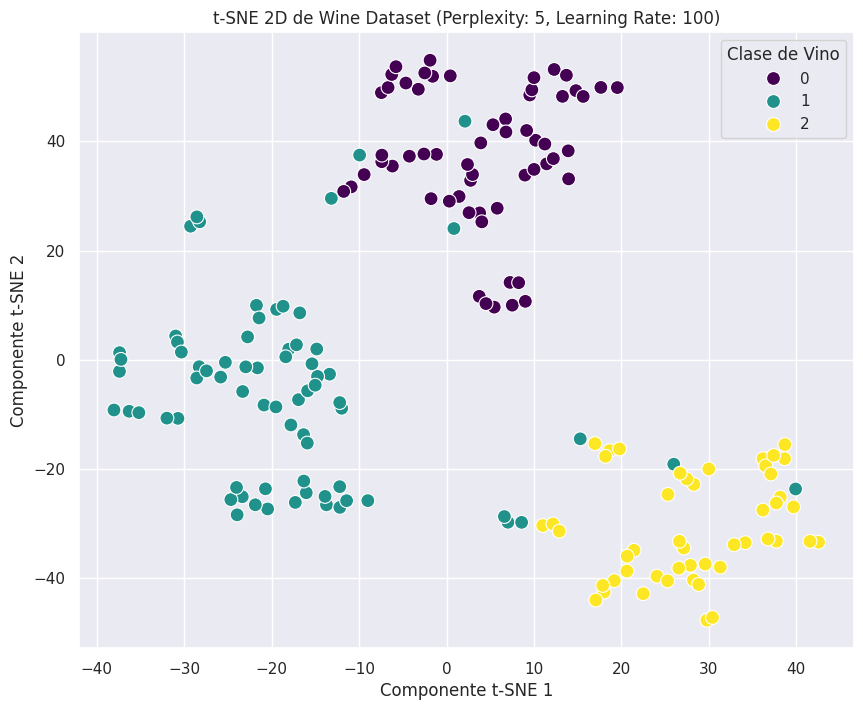


Aplicando t-SNE con perplexity=5 y learning_rate=200


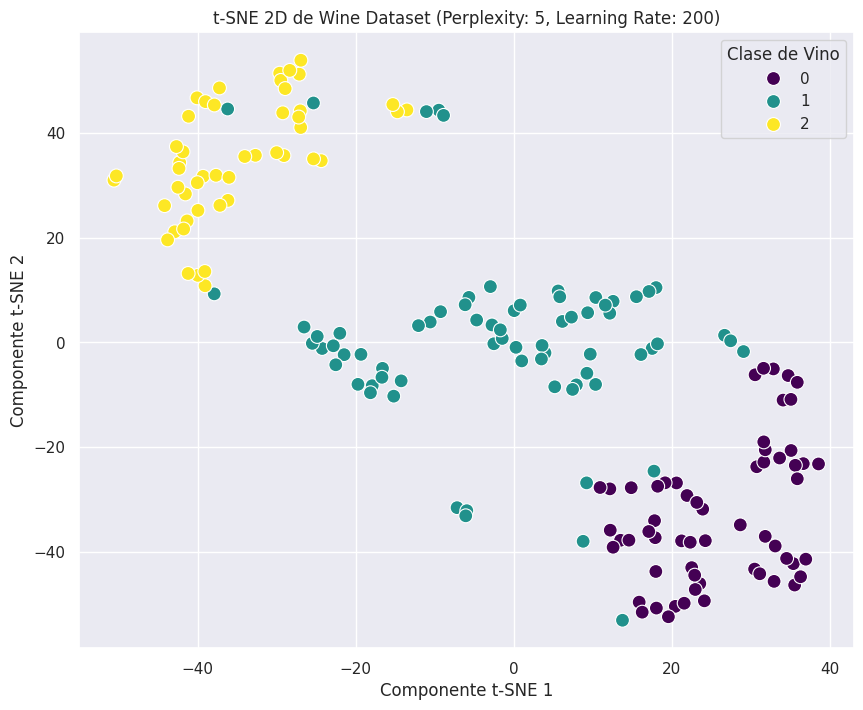


Aplicando t-SNE con perplexity=30 y learning_rate=100


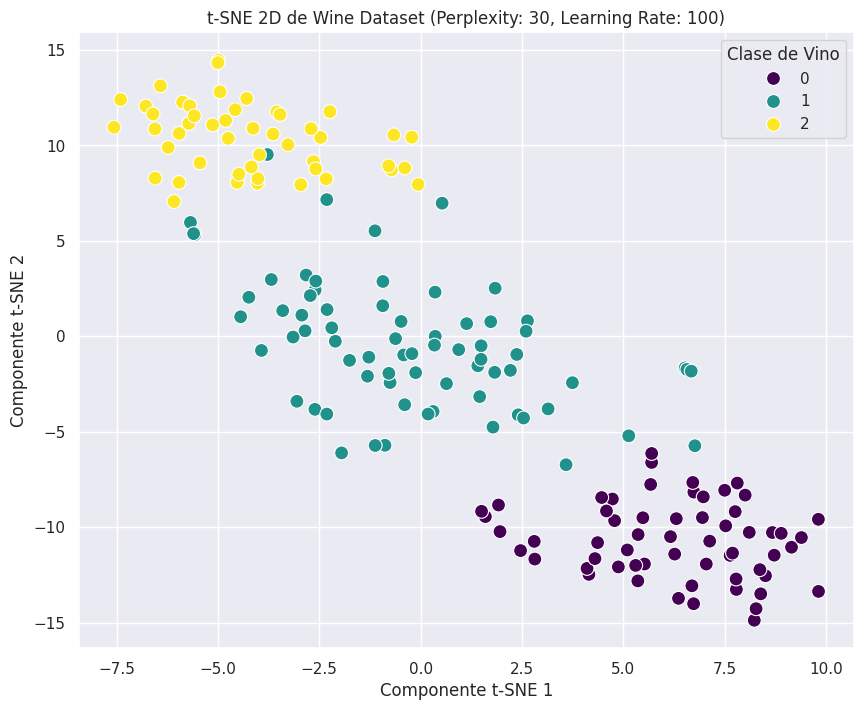


Aplicando t-SNE con perplexity=30 y learning_rate=200


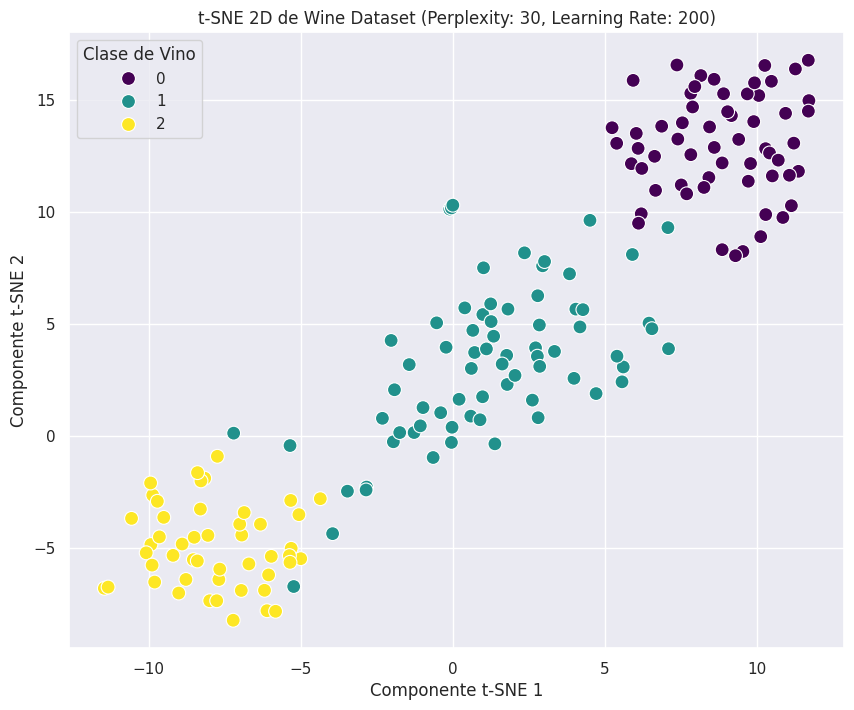


Aplicando t-SNE con perplexity=50 y learning_rate=100


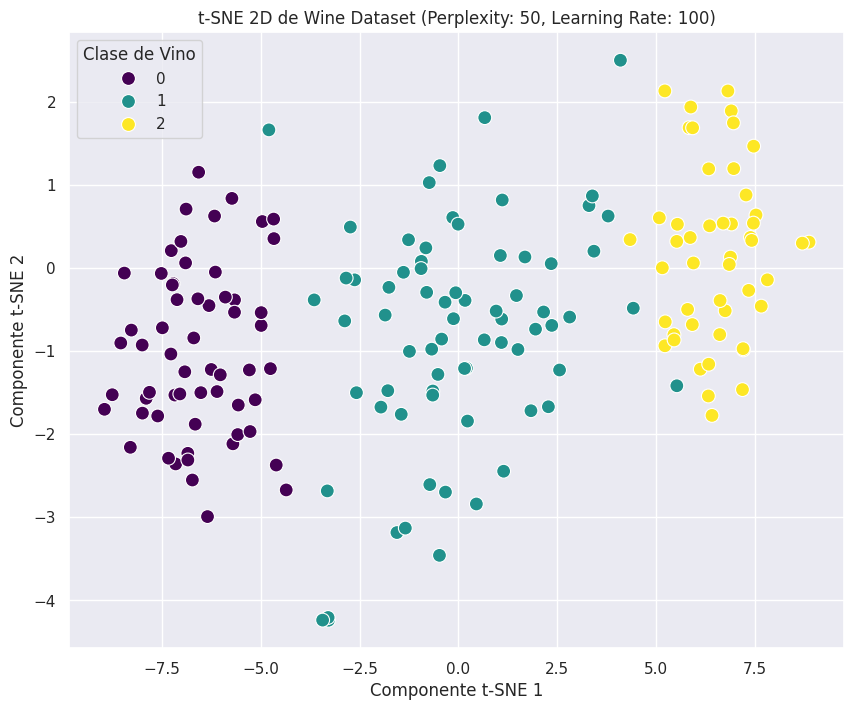


Aplicando t-SNE con perplexity=50 y learning_rate=200


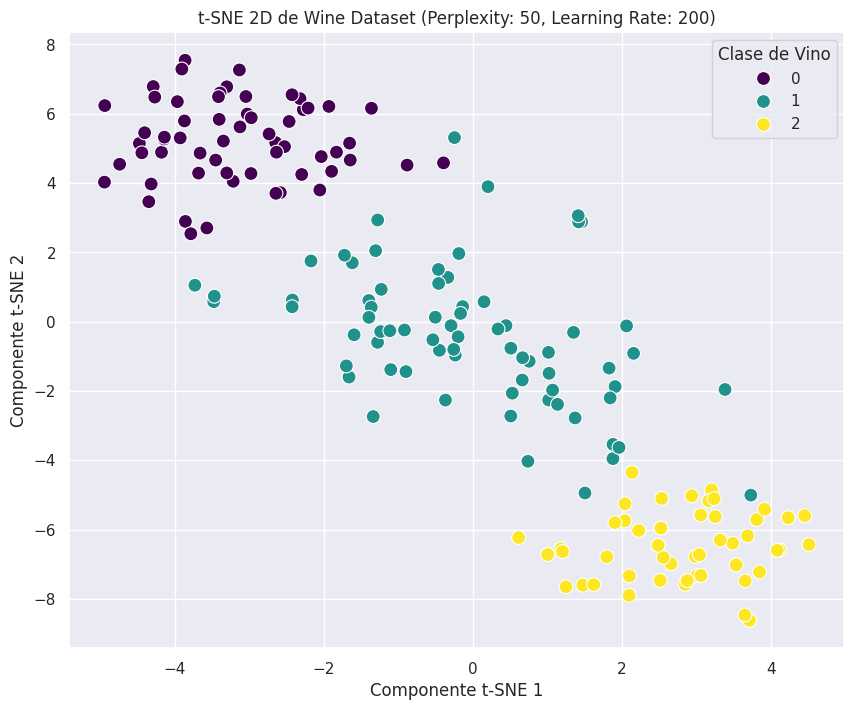

In [ ]:
# Aplicar t-SNE con diferentes configuraciones de hiperparámetros
perplexities = [5, 30, 50]
learning_rates = [100, 200]

# Normalize the data if not already done
# Assuming X_scaled from PCA section is available
# If not, uncomment the following lines:
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)


for perplexity in perplexities:
    for learning_rate in learning_rates:
        print(f"\nAplicando t-SNE con perplexity={perplexity} y learning_rate={learning_rate}")
        tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, random_state=42, init='pca')
        X_tsne = tsne.fit_transform(X_scaled)

        df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
        df_tsne['wine_class'] = y

        # Visualización 2D de t-SNE
        plt.figure(figsize=(10, 8))
        sns.scatterplot(x='TSNE1', y='TSNE2', hue='wine_class', data=df_tsne, palette='viridis', s=100)
        plt.title(f't-SNE 2D de Wine Dataset (Perplexity: {perplexity}, Learning Rate: {learning_rate})')
        plt.xlabel('Componente t-SNE 1')
        plt.ylabel('Componente t-SNE 2')
        plt.legend(title='Clase de Vino', loc='best')
        plt.grid(True)
        plt.show()

Observando las distintas visualizaciones de t-SNE generadas con diferentes *perplexities* y *learning rates*, analiza y discute:

*   **Efecto de los Hiperparámetros:** ¿Cómo cambian los agrupamientos de los puntos al variar el valor de *perplexity*? ¿Y al variar el *learning rate*? Describe las diferencias que notas en la estructura y separación de los clústeres.
*   **Separación de Clases:** ¿En alguna de las configuraciones de t-SNE se observa una separación clara y distinta entre las tres clases de vino (representadas por los diferentes colores)? ¿Qué configuración parece ofrecer la mejor separación visual?
*   **Relaciones No Lineales:** Basado en la comparación visual con los gráficos de PCA (que es un método lineal), ¿crees que t-SNE (un método no lineal) ha logrado capturar mejor las relaciones de vecindad o estructuras más complejas en los datos que permiten una mejor separación de las clases? Explica tu razonamiento.



### 3. **Comparación entre PCA y t-SNE**

* Contrastar las visualizaciones y discutir las **ventajas y limitaciones** de cada técnica:

  * PCA como método **lineal** para interpretar varianza y relaciones globales.
  * t-SNE como método **no lineal** que preserva relaciones locales y vecindades.
* Evaluar en qué escenarios prácticos sería más recomendable usar PCA (interpretabilidad, reducción previa para modelos) o t-SNE (exploración y visualización de clústeres).
* Reflexionar sobre la **importancia de la reducción de dimensionalidad** en datasets de alta dimensión como Wine, destacando su utilidad para:

  * Visualizar patrones ocultos en los datos.
  * Reducir complejidad y ruido antes de aplicar algoritmos de aprendizaje automático.
  * Facilitar la interpretación y comunicación de resultados.



**Interpretación de t-SNE y comparación con PCA :**

*   **t-SNE:** Al mirar los gráficos de t-SNE, fíjate en cómo los puntos del mismo color (misma clase de vino) se agrupan. Los diferentes *perplexities* y *learning rates* cambian un poco cómo se ven estos grupos; algunos valores podrían separar mejor las clases que otros. t-SNE es bueno para mostrar estos grupos visualmente, incluso si las diferencias entre ellos no son simples líneas rectas.

*   **Comparación con PCA:** Si comparas los gráficos de t-SNE con los de PCA, probablemente notarás que t-SNE separa los grupos de vinos de manera más clara. Esto sugiere que hay patrones en los datos que no son solo diferencias "rectas" o lineales, y t-SNE es mejor para encontrar y mostrar esas conexiones más complejas.

En resumen, t-SNE es genial para ver si hay grupos en tus datos y cómo se ven, mientras que PCA te ayuda a entender qué características son las más importantes en general. Ambas son útiles para visualizar datos complejos como este.